# Face recognition (identity match) using siamese convolutional network.

-----------------------------------------------------

In this model I try to train a siamese network that gets an input image and tries to find its label by surfing trough out the dataset and find a match.

In [1]:
import numpy as np
from glob import glob
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import layers, losses, optimizers, callbacks
import cv2
import matplotlib.pyplot as plt

### Unzip dataset & prepare to use

In [2]:
!tar -xvzf /kaggle/input/lfwpeople/lfw-funneled.tgz

lfw_funneled/
lfw_funneled/George_HW_Bush/
lfw_funneled/George_HW_Bush/George_HW_Bush_0001.jpg
lfw_funneled/George_HW_Bush/George_HW_Bush_0002.jpg
lfw_funneled/George_HW_Bush/George_HW_Bush_0003.jpg
lfw_funneled/George_HW_Bush/George_HW_Bush_0004.jpg
lfw_funneled/George_HW_Bush/George_HW_Bush_0005.jpg
lfw_funneled/George_HW_Bush/George_HW_Bush_0006.jpg
lfw_funneled/George_HW_Bush/George_HW_Bush_0007.jpg
lfw_funneled/George_HW_Bush/George_HW_Bush_0008.jpg
lfw_funneled/George_HW_Bush/George_HW_Bush_0009.jpg
lfw_funneled/George_HW_Bush/George_HW_Bush_0010.jpg
lfw_funneled/George_HW_Bush/George_HW_Bush_0011.jpg
lfw_funneled/George_HW_Bush/George_HW_Bush_0012.jpg
lfw_funneled/George_HW_Bush/George_HW_Bush_0013.jpg
lfw_funneled/Curtis_Strange/
lfw_funneled/Curtis_Strange/Curtis_Strange_0001.jpg
lfw_funneled/Marc_Grossman/
lfw_funneled/Marc_Grossman/Marc_Grossman_0001.jpg
lfw_funneled/Marc_Grossman/Marc_Grossman_0002.jpg
lfw_funneled/Marc_Grossman/Marc_Grossman_0003.jpg
lfw_funneled/Marc_Gros

### Load the dataset into memory (needs at least 21 Gb of ram)

In [3]:
# Extract image paths using glob
image_category_paths = glob("/kaggle/working/lfw_funneled/**")
unique_categories = len(image_category_paths) # Count how many uqniues do we have
names_dict = dict([y[::-1] for y in list(enumerate([x.split('/')[-1] for x in glob("/kaggle/working/lfw_funneled/**")]))]) # Convert names to a dict
no_records = 0

# Load the dataset into RAM
labeled_categories = {}

# Iterate over dataset folders and capture images
for parent in image_category_paths:
    person_name = parent.split("/")[-1]
    labeled_categories[person_name] = []
    # Iterate over images and load each one by one
    for image_path in glob(parent + "/*.jpg"):
        image = cv2.imread(image_path)
        labeled_categories[person_name].append(image)
        no_records += 1
        
# X_images = np.array(X_images) / 255
# y_labels = np.array(y_labels)
print(f"#Unique Categories: {unique_categories}, #Records: {no_records}")

#Unique Categories: 5760, #Records: 13233


### Verify images are correctly loaded and labeled by showing an example

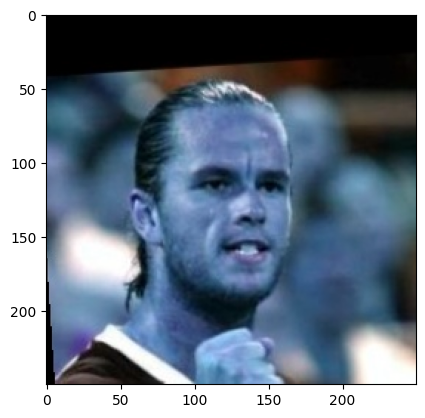

In [4]:
plt.imshow(labeled_categories['Xavier_Malisse'][0])
plt.show()